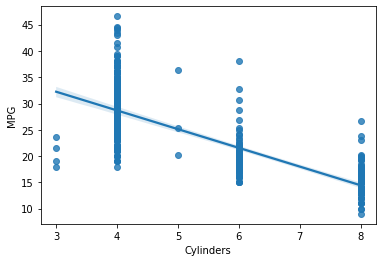

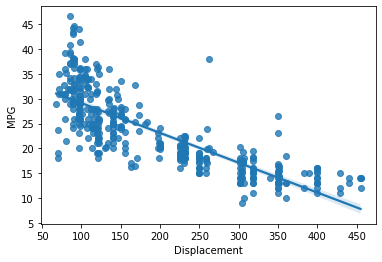

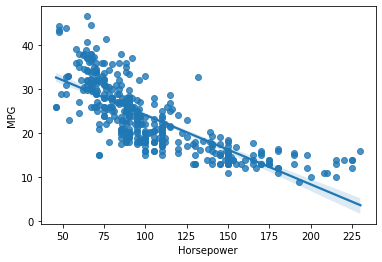

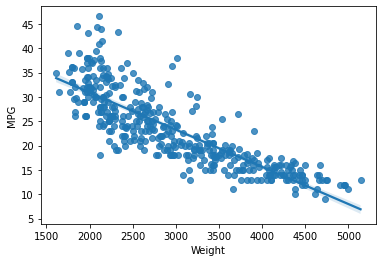

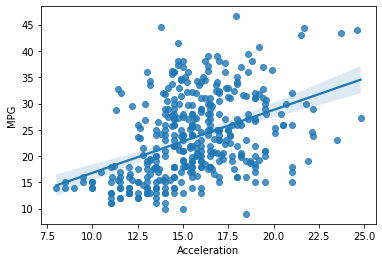

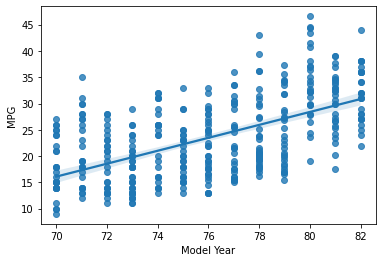

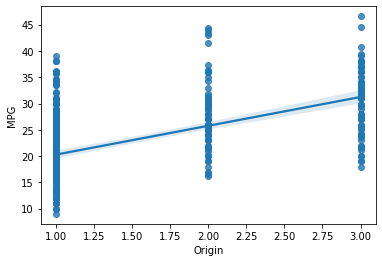

b = -18.499361128724768
                  Coef
Cylinders    -0.345789
Displacement  0.015109
Horsepower   -0.021302
Weight       -0.006142
Acceleration  0.037950
Model Year    0.767743
Origin        1.613457
                   MPG  Cylinders  Displacement  Horsepower    Weight  \
MPG           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
Cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
Displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
Horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
Weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
Acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
Model Year    0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
Origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              Acceleration  Model Year    Origin  
MPG               0.423329    0.580541  0.565209  
Cylinders        -0.504683   -0.

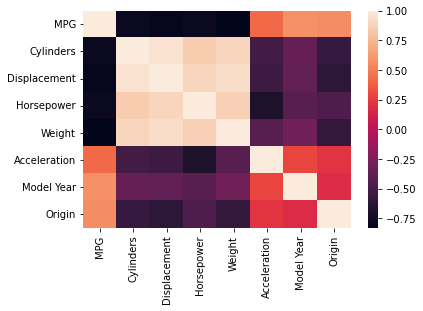

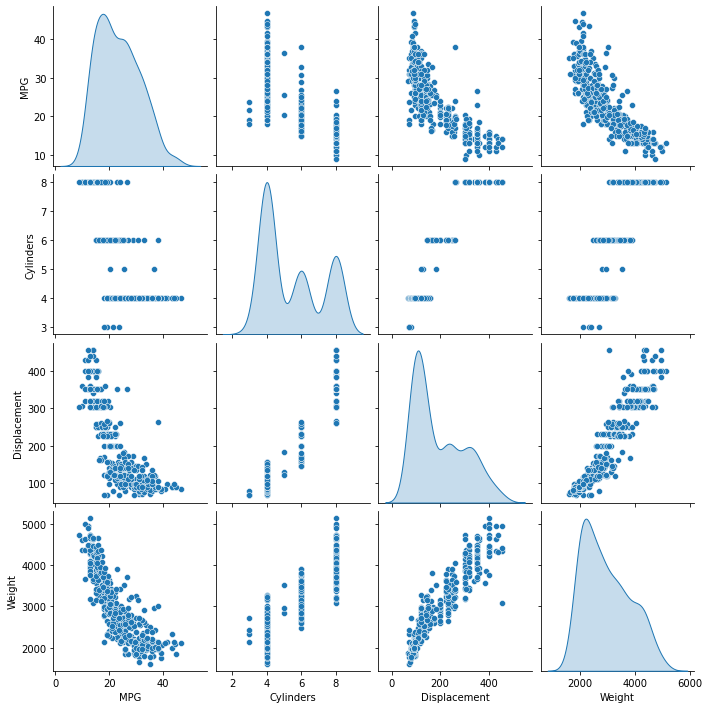

In [ ]:
#Isac do Nascimento Vieira N°19
#Matheus Diego Teixeira    N°24

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

path = 'auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
dataset = pd.read_csv(path, names = column_names, na_values = '?', comment='\t', sep=' ', skipinitialspace=True)

#print(data.head())
#print(data.shape)
#print(dataset.isna().sum())
dataset = dataset.dropna()

names = column_names
names.remove('MPG')

for var in names:
  plt.figure()
  sns.regplot(x=var, y='MPG', data = dataset)
plt.show()

y = dataset['MPG']
x = dataset[names]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print('b =',regressor.intercept_)
df_coefs = pd.DataFrame(data=regressor.coef_, index = x.columns, columns = ['Coef'])

print(df_coefs)
#mae = mean_absolute_error(y_test, preds)
#mse = mean_squared_error(y_test, preds)
#rmse =np.sqrt(mse)
#print("\nMean ab", mae)
#print("Mean sq", mse)
#print("Mean rsq", rmse)

#print("\n\nScore", regressor.score(x_train, y_train))

#mapa de calor de correlacoes
correlations = dataset.corr()
print(correlations)

sns.heatmap(correlations)

sns.pairplot(dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')
plt.show()